In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

In [2]:
#remove instances where individuals reported having taken Semer, a fictional drug
df = df[df.Semer == 'CL0']

In [3]:
arr = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
# Collapse values into never used = 0 and have used = 1, include drug name for label when OHE
for i in range(0,18):
    df[arr[i]].replace({"CL0": 0, "CL1": 1, "CL2": 1, "CL3": 1, "CL4": 1, "CL5": 1, "CL6": 1}, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from enum import IntEnum

X = df[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]
y_cols = ["Alcohol", "Amphet", "Cannabis", "Coke", "Ecstasy", "LSD", "Meth", "Mushrooms"]
y_enum = IntEnum("cols", y_cols, start = 0)
y = df[["Alcohol", "Amphet", "Cannabis", "Coke", "Ecstasy", "LSD", "Meth", "Mushrooms"]]

# def one_hot_encoding(df, col):
#     # one-hot encoding to represent classes
#     myData_encoder = LabelEncoder()
#     myData_encoded =  myData_encoder.fit_transform(df[col]) 

#     # binary encode
#     onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type

#     # reshape the array
#     myData_encoded = myData_encoded.reshape(len(myData_encoded), 1) 
#     onehot_encoded = onehot_encoder.fit_transform(myData_encoded) 
#     #print(onehot_encoded)
#     # convert ndarrary of encodings to dataframe using myData_encoder.classes_ as column names
#     return(pd.DataFrame(onehot_encoded, columns = myData_encoder.classes_))

# for col_name in y_cols:
#     #one-hot encode every y_col
#     y[y_enum[col_name].value] = one_hot_encoding(df, col_name)

## GRID SEARCH:

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

model_params = [None] * len(y_cols) #list of model parameters in y_cols order

#pass inputs X and target y
#returns dictionary of best params for hidden_layer_sizes and learning_rate_init
def search(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

    clf = MLPClassifier(hidden_layer_sizes=(32, 24, 12), learning_rate_init = 0.1, activation="logistic",solver = 'sgd', max_iter = 1000, random_state=1)

    # Grid Search
    max_iterations = [10, 50, 100, 300, 600, 1000]
    hidden_layer_sizes = [(24, 12), (32, 16), (64, 32), (32, 16, 8), (64, 32, 16)]
    learning_rate_init = [0.1, 0.2, 0.3, 0.4]
    activation = ["logistic", "relu", "tanh"]
    param_grid = dict(max_iter=max_iterations, hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, activation=activation)
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    # summarize results - this code was taken from a lecture example
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    
    return grid_result.best_params_

for drug in y_cols:
    print(drug)
    model_params[y_enum[drug].value] = search(X, y[drug])
    

Alcohol


/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.981348 using {'activation': 'tanh', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.3, 'max_iter': 100}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.981347 (0.000924) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 

Best: 0.671560 using {'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.3, 'max_iter': 50}
0.581572 (0.051826) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.660226 (0.000320) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.660226 (0.000320) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.659561 (0.000621) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.659561 (0.000621) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.659561 (0.000621) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.628893 (0.033850) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init

Best: 0.796793 using {'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.4, 'max_iter': 50}
0.753482 (0.032161) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.788134 (0.008330) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.788134 (0.008330) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.788134 (0.008330) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.788134 (0.008330) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.788134 (0.008330) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.714816 (0.099829) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init

Best: 0.652894 using {'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.2, 'max_iter': 300}
0.615585 (0.017099) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.636244 (0.015550) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.638240 (0.015612) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.640901 (0.016465) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.640901 (0.016465) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.640901 (0.016465) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.634914 (0.005451) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_ini

Best: 0.688865 using {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.2, 'max_iter': 50}
0.610230 (0.048980) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.681536 (0.016859) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.678874 (0.014771) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.678874 (0.014771) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.678874 (0.014771) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.678874 (0.014771) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.652197 (0.048324) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init

/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.697541 using {'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.2, 'max_iter': 10}
0.630900 (0.042387) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.693534 (0.004341) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.690873 (0.002456) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.688877 (0.003875) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.692204 (0.002983) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.692204 (0.002983) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.674204 (0.015239) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0

/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Best: 0.767480 using {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 50}
0.756162 (0.000230) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.746150 (0.020603) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.733486 (0.032189) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.733486 (0.032189) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.733486 (0.032189) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.733486 (0.032189) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.756162 (0.000230) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0

Best: 0.695545 using {'activation': 'relu', 'hidden_layer_sizes': (32, 16, 8), 'learning_rate_init': 0.1, 'max_iter': 10}
0.614221 (0.056709) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 10}
0.691550 (0.013619) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 50}
0.681549 (0.003832) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 100}
0.678222 (0.008333) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 300}
0.678222 (0.008333) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 600}
0.678222 (0.008333) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.1, 'max_iter': 1000}
0.663568 (0.024423) with: {'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init'

/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
for params in model_params:
    print(params)

{'activation': 'tanh', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.3, 'max_iter': 100}
{'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.3, 'max_iter': 50}
{'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.4, 'max_iter': 50}
{'activation': 'logistic', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.2, 'max_iter': 300}
{'activation': 'logistic', 'hidden_layer_sizes': (24, 12), 'learning_rate_init': 0.2, 'max_iter': 50}
{'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.2, 'max_iter': 10}
{'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 50}
{'activation': 'relu', 'hidden_layer_sizes': (32, 16, 8), 'learning_rate_init': 0.1, 'max_iter': 10}


***USE THESE MODELS***

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, confusion_matrix


models = [None] * len(y_cols) #list of models in y_cols order
conf_matrices = []  # List of of confusion matrices, one for each substance

#pass inputs X and target y with hyperparams hidden_layer_sizes and learning_rate_init
#returns trained model
def train(X, y, max_iter, hidden_layer_sizes, learning_rate_init, activation):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init = learning_rate_init, activation=activation, solver = 'sgd', max_iter = max_iter, random_state=1)

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test) 

    #accuracy and MSE
    print('\nModel Accuracy:', clf.score(X_test, y_test))
    print('Model MSE:', mean_squared_error(y_test, y_pred))
    print('Model Precision:', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall:', recall_score(y_test, y_pred, average='micro'), '\n')
    
    return clf, confusion_matrix(y_test, y_pred)

for drug, params in zip(y_cols, model_params):
    print(drug)
    #use parameters from gridsearch to train models
    models[y_enum[drug].value], c_f = train(X, y[drug], params['max_iter'], params['hidden_layer_sizes'], params['learning_rate_init'], params['activation'])
    conf_matrices.append(c_f)


Alcohol


/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Model Accuracy: 0.9867021276595744
Model MSE: 0.013297872340425532
Model Precision: 0.9867021276595744
Model Recall: 0.9867021276595744 

Amphet

Model Accuracy: 0.6622340425531915
Model MSE: 0.3377659574468085
Model Precision: 0.6622340425531915
Model Recall: 0.6622340425531915 

Cannabis

Model Accuracy: 0.8351063829787234
Model MSE: 0.16489361702127658
Model Precision: 0.8351063829787234
Model Recall: 0.8351063829787234 

Coke

Model Accuracy: 0.6223404255319149
Model MSE: 0.3776595744680851
Model Precision: 0.6223404255319149
Model Recall: 0.6223404255319149 

Ecstasy

Model Accuracy: 0.6781914893617021
Model MSE: 0.32180851063829785
Model Precision: 0.6781914893617021
Model Recall: 0.6781914893617021 

LSD


/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Model Accuracy: 0.7074468085106383
Model MSE: 0.2925531914893617
Model Precision: 0.7074468085106383
Model Recall: 0.7074468085106383 

Meth

Model Accuracy: 0.7287234042553191
Model MSE: 0.2712765957446808
Model Precision: 0.7287234042553191
Model Recall: 0.7287234042553191 

Mushrooms

Model Accuracy: 0.7074468085106383
Model MSE: 0.2925531914893617
Model Precision: 0.7074468085106383
Model Recall: 0.7074468085106383 



/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/brandon/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


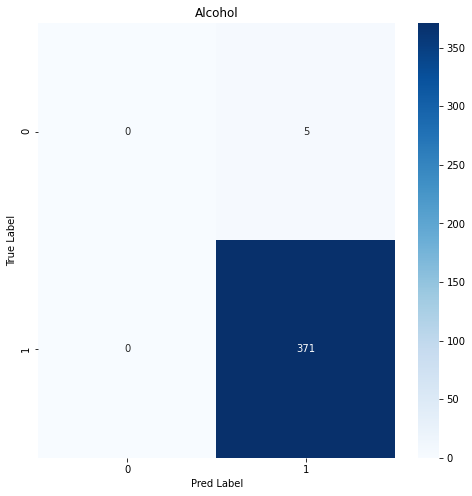

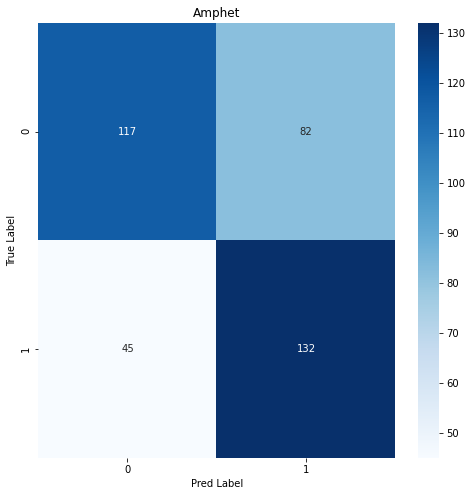

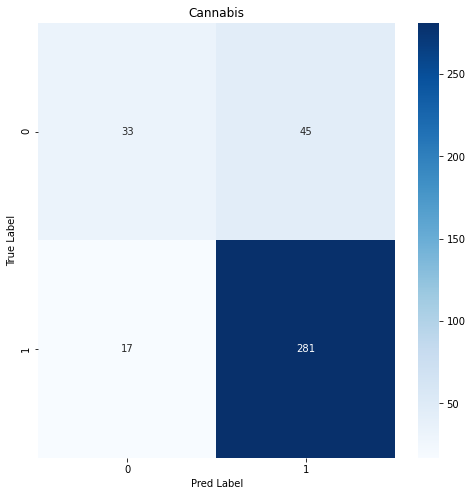

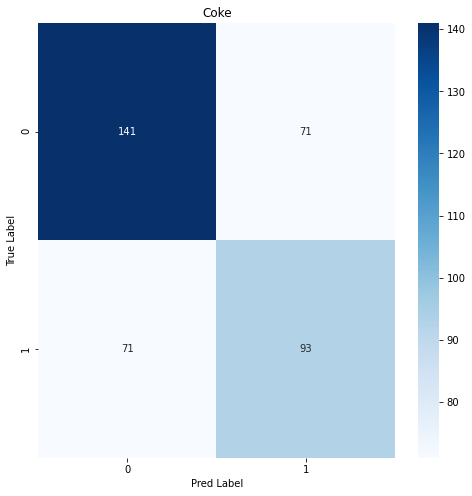

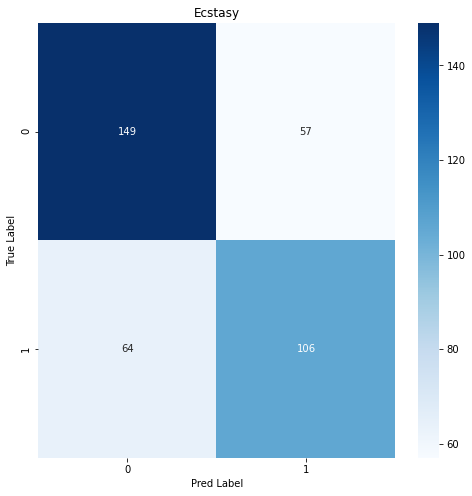

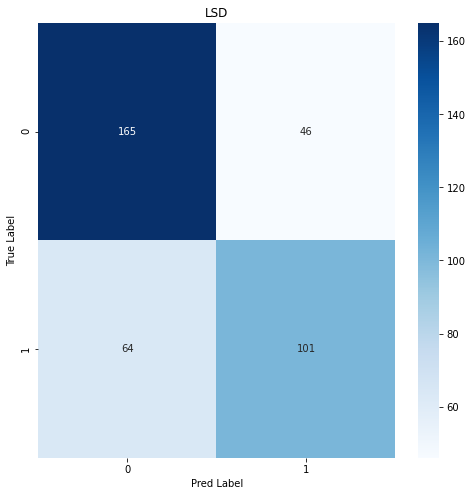

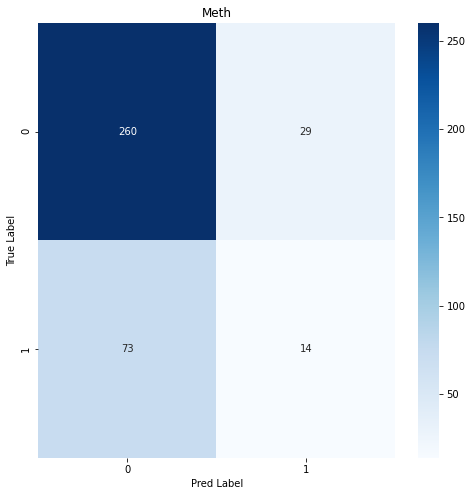

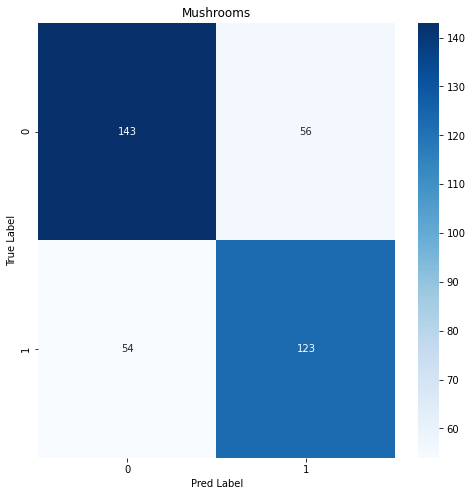

In [7]:
for i, m in enumerate(conf_matrices):
    fig, ax = plt.subplots(figsize=(8,8))
    fig = sns.heatmap(m, annot=True, cmap="Blues", fmt='g', ax=ax)
    fig.set_title(y_cols[i])
    fig.set_ylabel("True Label")
    fig.set_yticklabels(["0", "1"])
    fig.set_xlabel("Pred Label")
    fig.set_xticklabels(["0", "1"])

In [9]:
from joblib import dump, load
names = list(range(1, 9))

for model, name in zip(models, names):
    dump(model,'./personalityModels/PersonalityModel'+str(name)+'.joblib')